In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-ab-testing/marketing_AB.csv


In [80]:
#Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
from scipy.stats import shapiro

In [55]:
df=pd.read_csv('/kaggle/input/marketing-ab-testing/marketing_AB.csv')

In [56]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [57]:
df['test group'].value_counts()

test group
ad     564577
psa     23524
Name: count, dtype: int64

In [58]:
df.columns

Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

In [59]:
df.drop(columns={'Unnamed: 0'},inplace=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        588101 non-null  int64 
 1   test group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total ads      588101 non-null  int64 
 4   most ads day   588101 non-null  object
 5   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 23.0+ MB


df=pd.read

In [61]:
df.describe()

,user id,total ads,most ads hour
count,5.881010e+05,588101.000000,588101.000000
mean,1.310692e+06,24.820876,14.469061
std,2.022260e+05,43.715181,4.834634
min,9.000000e+05,1.000000,0.000000
25%,1.143190e+06,4.000000,11.000000
50%,1.313725e+06,13.000000,14.000000
75%,1.484088e+06,27.000000,18.000000
max,1.654483e+06,2065.000000,23.000000


In [62]:
df.isnull().sum()

user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [63]:
df.nunique()

user id          588101
test group            2
converted             2
total ads           807
most ads day          7
most ads hour        24
dtype: int64

In [64]:
type(df.columns)

pandas.core.indexes.base.Index

In [65]:
df.columns

Index(['user id', 'test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [66]:
data=df

In [67]:
data_psa = data[data['test group']=='psa']
data_ad = data[data['test group']=='ad']
print(f'====================== OBSERVATIONS ======================')
print(f"The number of instances that have seen advertisement (ad group): {data_ad.shape[0]}")
print(f"The number of instances that have not seen advertisement(psa group): {data_psa.shape[0]}\n")

print(f'========================== MEAN ==========================')
print(f"The mean of converted instances (True converted): {data['converted'].mean()*100:.2f}%")
print(f"The mean of not converted instances (False converted): {100-data['converted'].mean()*100:.2f}%")
print(f"The mean of converted instances in the ad group: {data_ad['converted'].mean()*100:.2f}%")
print(f"The mean of converted instances in the psa group: {data_psa['converted'].mean()*100:.2f}%")

====================== OBSERVATIONS ======================
The number of instances that have seen advertisement (ad group): 564577
The number of instances that have not seen advertisement(psa group): 23524

========================== MEAN ==========================
The mean of converted instances (True converted): 2.52%
The mean of not converted instances (False converted): 97.48%
The mean of converted instances in the ad group: 2.55%
The mean of converted instances in the psa group: 1.79%


In [68]:
#Based on this we can see that most of them have seen the ads. 
#People in ads group buy more than psa group


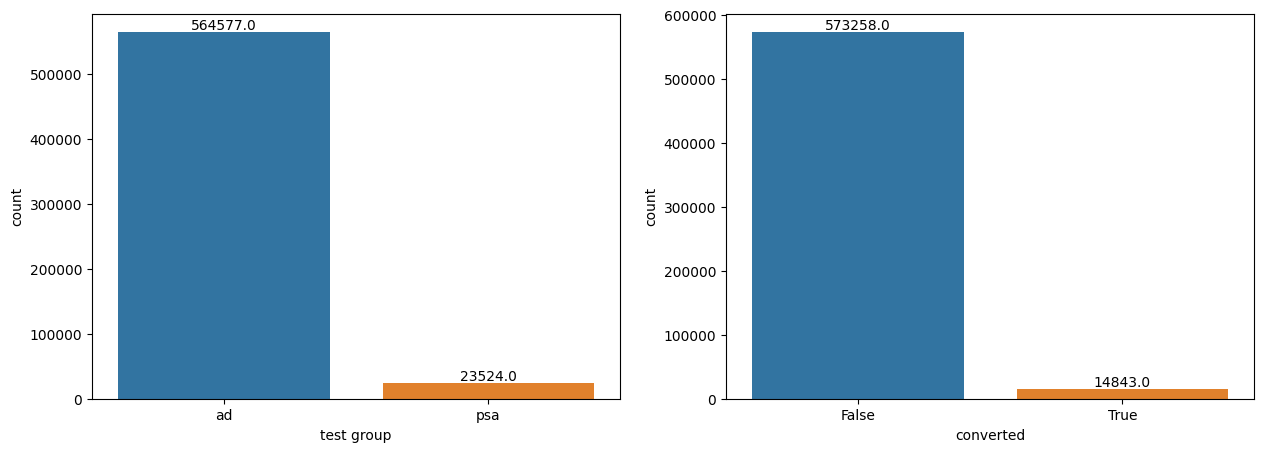

In [69]:
columns_to_plot = ['test group', 'converted']

fig, ax = plt.subplots(1, len(columns_to_plot), figsize=(15, 5), dpi=100)

for i, col in enumerate(columns_to_plot):
    # Count plot for the current column with count labels
    sns.countplot(data=data, x=col, ax=ax[i])
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

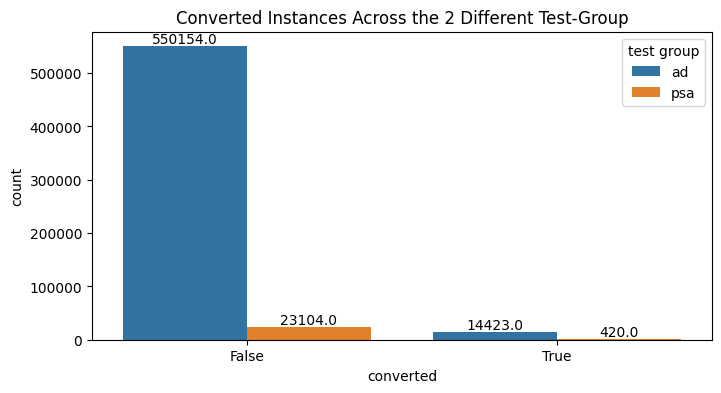

In [70]:
plt.figure(figsize=(8, 4), dpi=100)
sns.countplot(data=data, x='converted', hue='test group')
plt.title('Converted Instances Across the 2 Different Test-Group')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

These charts show that the people in the ad group bought much more than the psa group. َSo, according to the above results, a hypothesis can be that advertising is an important indicator for sales increase.
To evaluate this hypothesis and also to understand that there is a significant difference between the ad and psa groups, we should take Statistics Tests such as ABTest, and Independent TTest.
In addition, to find the relation between the test group and the converted, we should use Chi2Test.

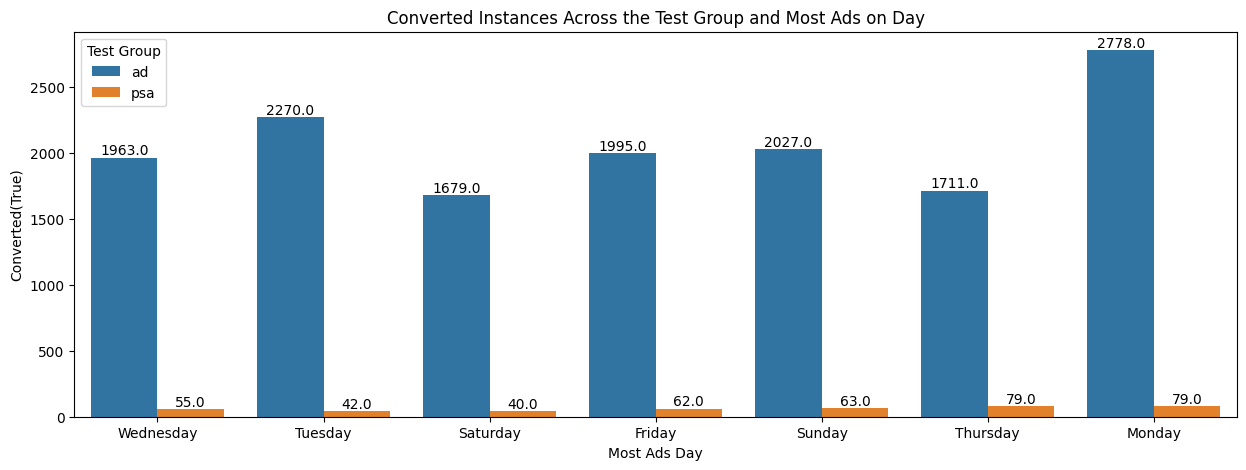

In [71]:
# Create a count plot for 'test group', 'most ads day', and 'converted' values
plt.figure(figsize=(15, 5), dpi=100)
sns.countplot(data=data[data['converted'] == True], x='most ads day', hue='test group')

plt.title('Converted Instances Across the Test Group and Most Ads on Day')
plt.xlabel('Most Ads Day')
plt.ylabel('Converted(True)')
plt.legend(title='Test Group', loc='upper left')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

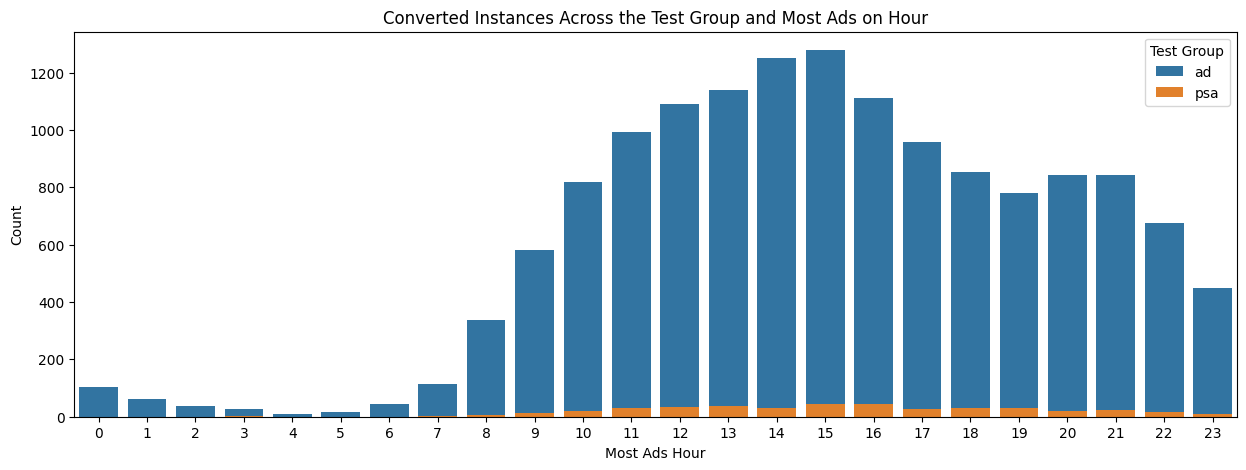

In [72]:
plt.figure(figsize=(15, 5), dpi=100)
sns.countplot(x='most ads hour', hue='test group', data=data[data['converted'] == True], dodge=False)
plt.title('Converted Instances Across the Test Group and Most Ads on Hour')
plt.xlabel('Most Ads Hour')
plt.ylabel('Count')
plt.legend(title='Test Group')
plt.show()

Most purchases occur on Mondays compared to other days.
In addition, people are more interested in shopping during the afternoon, especially between 14:00 and 15:00.

**Hypotheses:**

* Null Hypothesis (H0): There is no significant difference in buying behavior between the ad and psa groups.
* Alternative Hypothesis (H1): There is a significant difference in buying behavior between the ad and psa groups. (The alternative hypothesis contradicts the null hypothesis, suggesting that there is a significant difference between the means of the two groups.)

**Chi2Test**

The chi-square test for independence is suitable for comparing categorical variables to determine if they are independent or associated. In this case, it can help determine if there's a significant difference in buying behavior between the ad and psa groups.

Chi-square test measures the association between two categorical variables. It compares the observed frequencies of the categories with the frequencies that would be expected if the two variables were independent.
The test generates a chi-square statistic and a p-value. A low p-value indicates that the variables are dependent, rejecting the null hypothesis.

There are two approaches to calculate the Chi2Test:

From scratch
Using stats.chi2_contingency
It should be mentioned that in both approaches, in the first step, we should create a crosstab between converted and test group columns.

In [73]:
chi2 = pd.crosstab(data['converted'], data['test group'], margins=True)
chi2

test group,ad,psa,All
converted,,,
False,550154,23104,573258
True,14423,420,14843
All,564577,23524,588101


In [74]:
# Chi2Test from stats

obs = np.array([chi2.iloc[0][: -1].values, chi2.iloc[1][: -1].values])
statistic, pvalue, dof, expected_freq = stats.chi2_contingency(obs)
print(f'The result of Chi2Test:\nChi-square statistic = {statistic:.2f}\nDegree of Freedom = {dof}\nP-value = {pvalue:.2f}')

The result of Chi2Test:
Chi-square statistic = 54.01
Degree of Freedom = 1
P-value = 0.00


The P-value is close to 0, which means there is good evidence to reject the null hypothesis. Our threshold rejecting the Null is usually less than 0.05.

So, according to the result of the Chi2Test, we can see that there is a relation between the test group and converted features.

AB Test

Binomial Distribution models success/failure in each group.

In [75]:
ad_converted = np.random.choice([1, 0], size=len(data_ad), p=[data.converted.mean(), (1 - data.converted.mean())])
psa_converted = np.random.choice([1, 0], size=len(data_psa), p=[data.converted.mean(), (1 - data.converted.mean())])

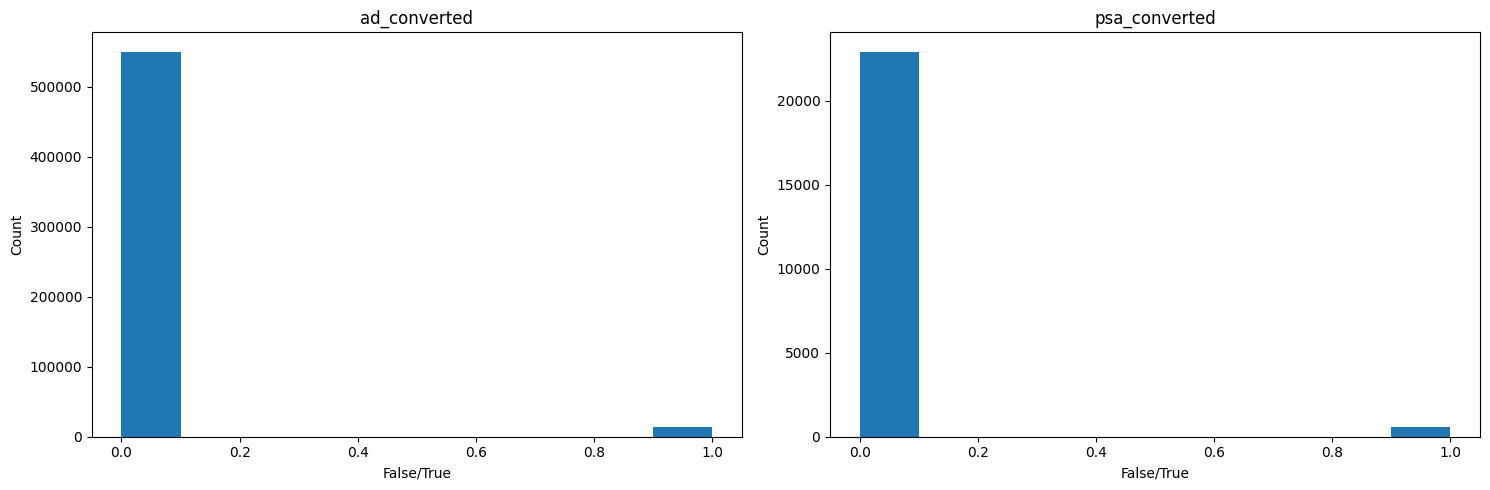

In [76]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5), dpi=100)
ax1.hist(ad_converted);
ax2.hist(psa_converted);
ax1.set(title='ad_converted', xlabel='False/True', ylabel='Count');
ax2.set(title='psa_converted', xlabel='False/True', ylabel='Count');
plt.tight_layout()

Step 1: Generating Random Samples
Using numpy's random.binomial() function, random samples of conversions are generated for both the ad and psa groups.

The number of trials is set to the length of each group, and the probability of success (conversion rate) is set to the overall conversion rate from the entire dataset.

Step 2: Calculating Differences
Differences in conversion rates between the ad and psa groups are computed for each random sample.

Additionally, the actual difference in conversion rates between the ad and psa groups in the original dataset is calculated.

Step 3: Printing Results
The mean of differences of conversion rates from the random samples and the mean difference from the original dataset are printed.

The p-value is calculated as the proportion of random samples that have a difference greater than the actual difference observed in the original dataset.

In [77]:
# Generate random samples for ad and psa groups
ad_converted = np.random.binomial(len(data_ad), data.converted.mean(), 10000) / len(data_ad)
psa_converted = np.random.binomial(len(data_psa), data.converted.mean(), 10000) / len(data_psa)

# Calculate differences
p_diffs = ad_converted - psa_converted
ab_data_diff = data_ad['converted'].mean() - data_psa['converted'].mean()

# Print results
print("Results of AB Test Simulation:")
print("----------------------------------------------------")
print(f"Mean difference of randomly generated instances: {p_diffs.mean():.5f}")
print(f"Actual difference between ad and psa groups: {ab_data_diff:.5f}")
p_value = (p_diffs > ab_data_diff).mean()
print(f"P-value: {p_value * 100:.2f}%")
print("----------------------------------------------------")
if p_value < 0.05:
    print("There is a significant difference in conversion rates between ad and psa groups.")
else:
    print("There is no significant difference in conversion rates between ad and psa groups.")

Results of AB Test Simulation:
----------------------------------------------------
Mean difference of randomly generated instances: -0.00000
Actual difference between ad and psa groups: 0.00769
P-value: 0.00%
----------------------------------------------------
There is a significant difference in conversion rates between ad and psa groups.


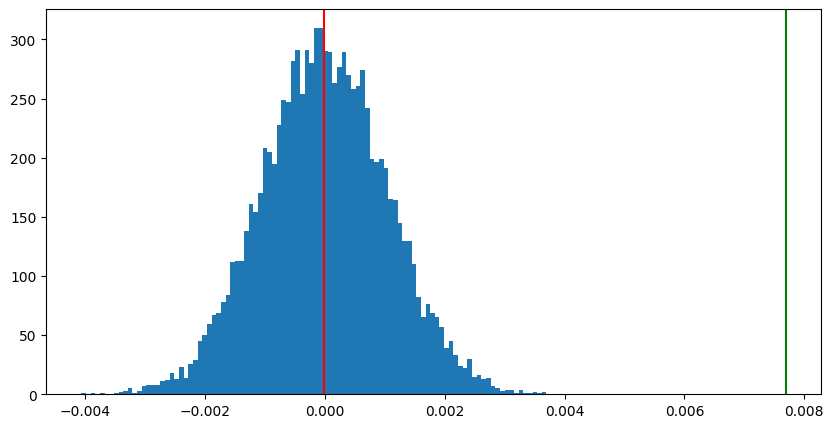

In [78]:
plt.figure(figsize=(10, 5), dpi=100)
plt.hist(p_diffs, bins=100)
low = ab_data_diff
higth = p_diffs.mean()
plt.axvline(x=low, color='g')
plt.axvline(x=higth, color='r')

**T TEST**

The T-Test calculates a test statistic (t-value) based on the means and standard deviations of the two groups, along with the sample sizes. This t-value is then compared to a critical value from the t-distribution to determine statistical significance.

One of the key assumptions of the T-Test is that the data within each group follows a normal distribution.

Since test group and converted columns are categorical (non-continuous), we cannot check for normality directly. Instead, we should check whether the assumptions of the T-test hold for the data. This includes: 1. Both groups are independent. 2. The samples are approximately normally distributed. 3. Homogeneity of variances.

So, the T-test is not suitable for this dataset since it requires continuous data. To check the normality of the data, we can use the Shapiro-Wilk test for each group separately.

In [81]:
ad_group = data[data['test group'] == 'ad']['converted']
psa_group = data[data['test group'] == 'psa']['converted']

stat_ad, p_ad = shapiro(ad_group)
stat_psa, p_psa = shapiro(psa_group)

print("Shapiro-Wilk Test - Ad Group: Statistic=%.3f, p-value=%.3f" % (stat_ad, p_ad))
print("Shapiro-Wilk Test - PSA Group: Statistic=%.3f, p-value=%.3f" % (stat_psa, p_psa))

Shapiro-Wilk Test - Ad Group: Statistic=0.142, p-value=0.000
Shapiro-Wilk Test - PSA Group: Statistic=0.110, p-value=0.000


/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


When the p-value of the Shapiro-Wilk test is less than 0.05 (significant level), it indicates that the data does not follow a normal distribution. So, for this dataset, we can't use T-Test.


